Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

In [2]:
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Test')

In [6]:
data_dir_train

PosixPath('/content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train')

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [8]:
#Finding all the classes 
CLASS_NAMES=np.array([item.name for item in data_dir_train.glob('*')] )
CLASS_NAMES

array(['actinic keratosis', 'basal cell carcinoma',
       'pigmented benign keratosis', 'nevus', 'melanoma',
       'dermatofibroma', 'seborrheic keratosis', 'vascular lesion',
       'squamous cell carcinoma'], dtype='<U26')

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [9]:
batch_size = 32
# For VGG19 the input shape and size by deafult is 244,244 and hence the same is kept
img_height = 180 # This should map with the height and width of the pretrained model
img_width = 180 # This should map with the height and width of the pretrained model

Use 80% of the images for training, and 20% for validation.

In [10]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [11]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [12]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [13]:
len(train_ds)

56

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

##### Code to show images in all the classes

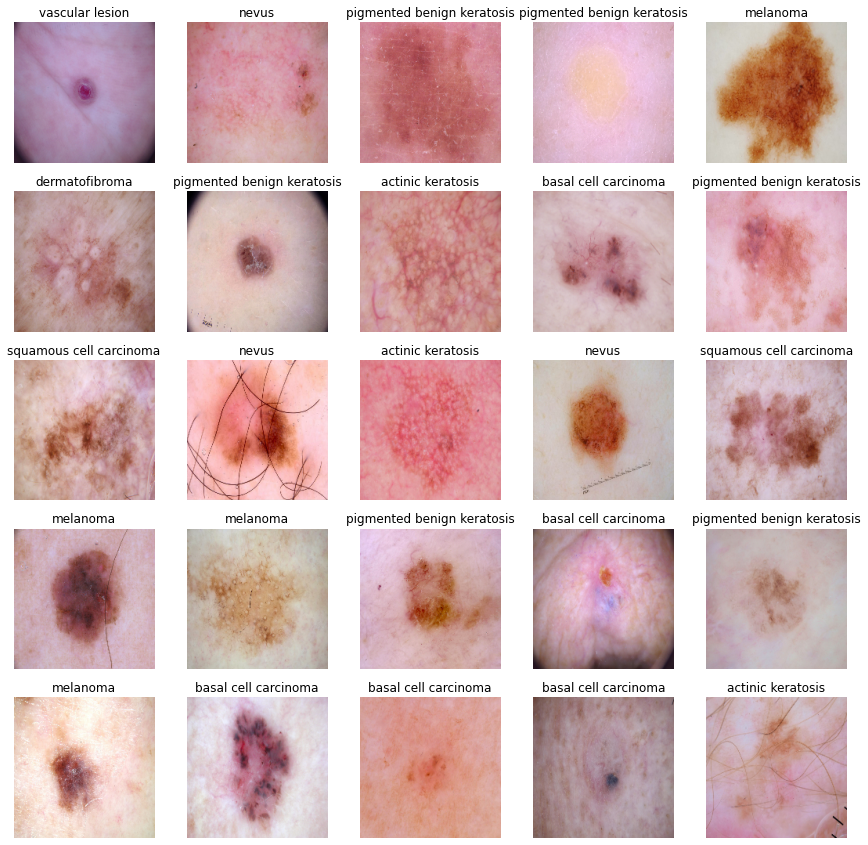

In [14]:
plt.figure(figsize=(15,15))
for images , labels in train_ds.take(1):
    for i in range(25):
        ax= plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [16]:
### Creating the first model

model = Sequential([
    #layers.Input(shape=(180,180,3)),
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
 ])

### Compile the model
We have chosen appropirate optimiser and loss function for model training 
optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy'

In [17]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
#building the model
model.build

<bound method Sequential.build of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f254f512890>>

In [21]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 259200)            0

### Train the model

In [20]:
#Training the first model with 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 408s 2s/step - loss: 3.8274 - accuracy: 0.1873 - val_loss: 1.9713 - val_accuracy: 0.3065
Epoch 2/20
56/56 [==============================] - 2s 41ms/step - loss: 1.8858 - accuracy: 0.3276 - val_loss: 1.6330 - val_accuracy: 0.3960
Epoch 3/20
56/56 [==============================] - 2s 41ms/step - loss: 1.6006 - accuracy: 0.4264 - val_loss: 1.4679 - val_accuracy: 0.5034
Epoch 4/20
56/56 [==============================] - 2s 41ms/step - loss: 1.4193 - accuracy: 0.5172 - val_loss: 1.4565 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 2s 41ms/step - loss: 1.3054 - accuracy: 0.5381 - val_loss: 1.4804 - val_accuracy: 0.4877
Epoch 6/20
56/56 [==============================] - 2s 41ms/step - loss: 1.1975 - accuracy: 0.5576 - val_loss: 1.4171 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 2s 41ms/step - loss: 1.1326 - accuracy: 0.5927 - val_loss: 1.5209 - val_accuracy: 0.4966
Epoch 8/20
56

### Visualizing training results

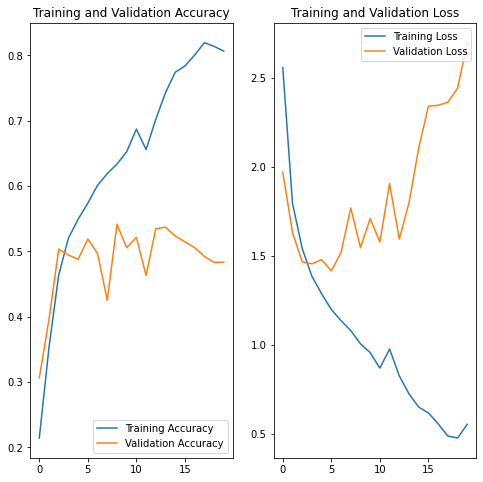

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### First Model findings here
 - The model is Overfitting as the Traning Accuracy > Validation accuracy and  Training loss < Validation loss
 - We can clearly see validation accuracy is dropped to 0.48.

## Data Augmentation Strategy
After analysing the model fit history for presence of underfit or overfit, choosing the appropriate data augumentation strategy below


In [23]:
#after analysing the model fit history for presence of underfit or overfit, choosing the appropriate data augumentation strategy below

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),      
  ]
)

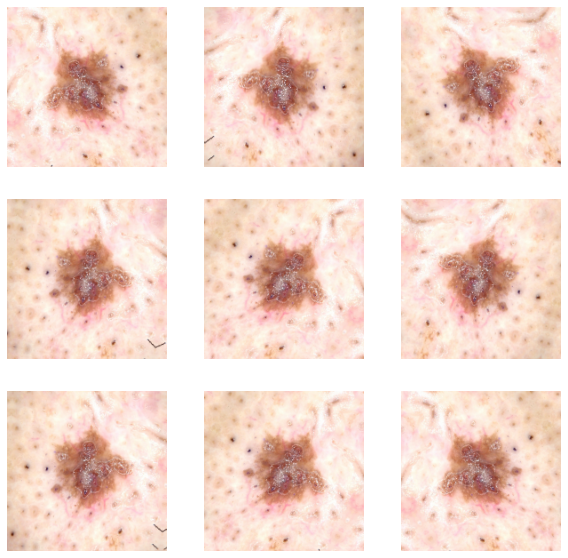

In [24]:
# visualizing  augmentation strategy works for one instance of training image.

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        #plt.title(CLASS_NAMES[int(labels[i])])
#         plt.title(int(labels[i]))
        plt.axis("off")

### Todo:
### Creating the 2nd model with augmentation strategy, compile and train the model


In [25]:
## Using Dropout layer as there was an evidence of overfitting in the findings

model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    #layers.Dropout(0.2),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    #layers.Dropout(0.2),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(9, activation='softmax')
])




### Compiling the model

In [26]:
#Compiling the 2nd model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [27]:
## training model with 20 epochs

history =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 50ms/step - loss: 3.8035 - accuracy: 0.1991 - val_loss: 1.8231 - val_accuracy: 0.3624
Epoch 2/20
56/56 [==============================] - 3s 47ms/step - loss: 1.8778 - accuracy: 0.3132 - val_loss: 1.7090 - val_accuracy: 0.4564
Epoch 3/20
56/56 [==============================] - 3s 47ms/step - loss: 1.6799 - accuracy: 0.3898 - val_loss: 1.5471 - val_accuracy: 0.4676
Epoch 4/20
56/56 [==============================] - 3s 47ms/step - loss: 1.5769 - accuracy: 0.4477 - val_loss: 1.5007 - val_accuracy: 0.4810
Epoch 5/20
56/56 [==============================] - 3s 47ms/step - loss: 1.4778 - accuracy: 0.5022 - val_loss: 1.4236 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 3s 47ms/step - loss: 1.4541 - accuracy: 0.4912 - val_loss: 1.4248 - val_accuracy: 0.5347
Epoch 7/20
56/56 [==============================] - 3s 47ms/step - loss: 1.3891 - accuracy: 0.5318 - val_loss: 1.3876 - val_accuracy: 0.5145
Epoch 8/20
56

### Visualizing the results for 2nd model

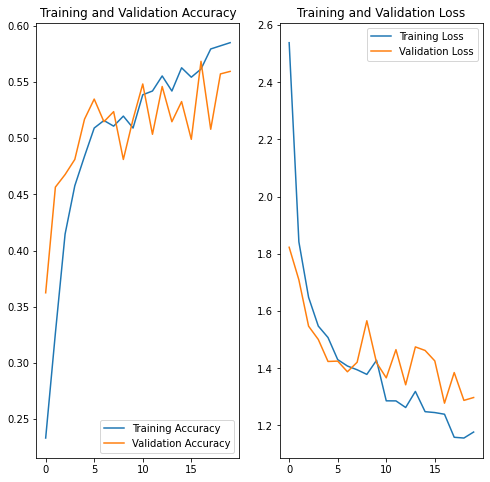

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Findings for 2nd Model
- Accuracy for Train and validation set is around 59 & 56%
- We can see that we validation loss has been dropped now but still the accuracy hasnt improved yet


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [30]:
#Creating the class distribution of classes in train set
#Creating the original df ,consists of existing images
from glob import glob
path_list_existing = [x for x in glob(os.path.join(data_dir_train, '*','*.jpg'))]
lesion_list_existing = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_existing = dict(zip(path_list_existing, lesion_list_existing))
original_df = pd.DataFrame(list(dataframe_dict_existing.items()),columns = ['Path','Label'])
original_df.head()

,Path,Label
0,/content/gdrive/MyDrive/Colab Notebooks/skinca...,actinic keratosis
1,/content/gdrive/MyDrive/Colab Notebooks/skinca...,actinic keratosis
2,/content/gdrive/MyDrive/Colab Notebooks/skinca...,actinic keratosis
3,/content/gdrive/MyDrive/Colab Notebooks/skinca...,actinic keratosis
4,/content/gdrive/MyDrive/Colab Notebooks/skinca...,actinic keratosis


In [31]:
#taking the value counts of existing labels in train set
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

In [34]:
x= original_df['Label'].value_counts().index
y= original_df['Label'].value_counts().values

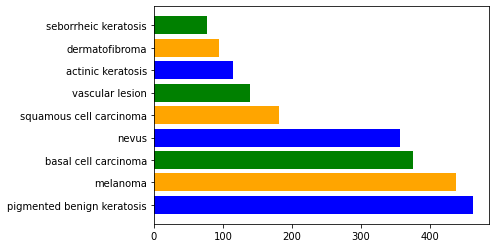

In [37]:
plt.barh(x, y, color=['blue', 'orange', 'green'])
plt.show()

#### We can see that for some of the classes the image count is very less

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- Answer :- seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
- Answer :- pigmented benign keratosis 


#### **Todo:** Rectify the class imbalance
#### **Context:** Using a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [38]:
pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [39]:
path_to_training_dataset= str(data_dir_train )+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F2530149A90>:   0%|          | 2/500 [00:00<01:12,  6.88 Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F24DB84D590>: 100%|██████████| 500/500 [00:18<00:00, 27.73 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F24DA3AD850>: 100%|██████████| 500/500 [00:18<00:00, 27.04 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F24E408EBD0>: 100%|██████████| 500/500 [00:18<00:00, 26.57 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F2544858AD0>: 100%|██████████| 500/500 [01:25<00:00,  5.87 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F24DB855B50>: 100%|██████████| 500/500 [01:20<00:00,  6.24 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F24E4051D90>:   0%|          | 1/500 [00:00<01:07,  7.38 Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F254460F810>: 100%|██████████| 500/500 [00:19<00:00, 26.20 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F24DA3C20D0>: 100%|██████████| 500/500 [00:40<00:00, 12.36 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2544A95D90>: 100%|██████████| 500/500 [00:18<00:00, 27.20 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F24E45CC090>: 100%|██████████| 500/500 [00:18<00:00, 27.61 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [40]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [41]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[:10]

['/content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029133.jpg_2dc42367-3c01-4cce-a269-6a476e5021e1.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027536.jpg_14463bcf-f7dc-470a-b6fa-389971ae309d.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031993.jpg_1d29a7b5-65f8-4490-b1e7-1dbb11b36304.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033811.jpg_be6afbfa-713d-424d-86cd-d12c07eb7853.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031823.jpg_31325c69-3472-428a-bde4-20ade6e1fe4c.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/skincancer_Images/Train/actinic keratosis/output/actinic keratosis_o

In [42]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:10]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [43]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [44]:
# Creating dataframe which will combine the existing images dataframe with new df
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [45]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

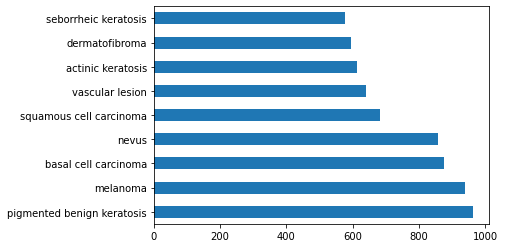

In [46]:
new_df['Label'].value_counts().plot.barh()
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [47]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [65]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [66]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [67]:

#Creating the final model after handling class imbalance 
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    #layers.Dropout(0.2),    
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    #layers.Dropout(0.2),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(9, activation='softmax')
])




#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [68]:
## compiling the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [69]:
epochs = 30
## Your code goes here, use 30 epochs.

history_final =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 39s 220ms/step - loss: 2.1231 - accuracy: 0.1747 - val_loss: 1.7218 - val_accuracy: 0.3601
Epoch 2/30
169/169 [==============================] - 38s 220ms/step - loss: 1.5867 - accuracy: 0.4151 - val_loss: 1.4175 - val_accuracy: 0.4558
Epoch 3/30
169/169 [==============================] - 38s 218ms/step - loss: 1.4092 - accuracy: 0.4578 - val_loss: 1.4519 - val_accuracy: 0.4402
Epoch 4/30
169/169 [==============================] - 38s 218ms/step - loss: 1.3364 - accuracy: 0.4881 - val_loss: 1.2631 - val_accuracy: 0.5226
Epoch 5/30
169/169 [==============================] - 38s 218ms/step - loss: 1.2493 - accuracy: 0.5229 - val_loss: 1.3010 - val_accuracy: 0.5160
Epoch 6/30
169/169 [==============================] - 38s 220ms/step - loss: 1.1083 - accuracy: 0.5738 - val_loss: 1.1684 - val_accuracy: 0.5598
Epoch 7/30
169/169 [==============================] - 38s 219ms/step - loss: 1.0365 - accuracy: 0.6283 - val_loss: 1.0838 - val_ac

#### **Todo:**  Visualize the model results

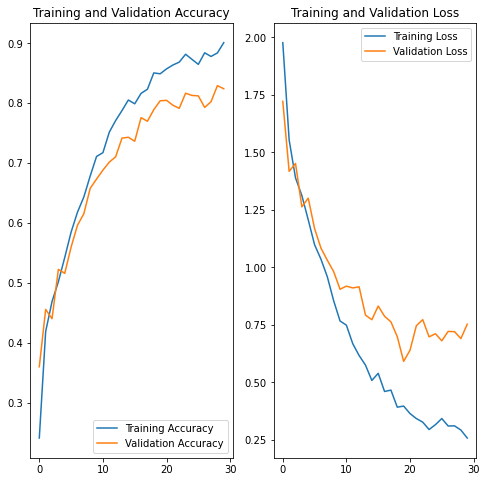

In [70]:
acc = history_final.history['accuracy']
val_acc = history_final.history['val_accuracy']

loss = history_final.history['loss']
val_loss = history_final.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

- Answer :- Definately class imbalance helped to achieve more accuracy . Please fine below the results


## Results
- Training accuracy for the latest model after handling class imbalance is 89.7% 
- Validation accuracy for the latest model is 82.4%
- We have seen huge decrease in the training and validation loss
- Hence we can say that now model is not overfitting.